## Test SVM
#### Author : Tom Guedon
#### Last modification : 15/07/2019

In [1]:
from momAPI.Svm.svm import MomSvm
from momAPI.Svm.kernels import polynomial
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import numpy.random as alea
import pandas as pd
from sklearn.model_selection import train_test_split
from random import gauss
plt.style.use("seaborn-darkgrid")

### Custom database

In [4]:
X_1=np.array([[1.5*np.cos(i)+gauss(0,0.1),1.5*np.sin(i)+gauss(0,0.1)]for i in range(500)])
X_2=np.array([[0.2*np.sin(i*1.124)+gauss(0,0.1),0.2*np.cos(i*1.124)+gauss(0,0.1)]for i in range(500)])

y_1=np.array([1.0]*500)
y_2=np.array([-1.0]*500)

X=np.concatenate((X_1,X_2),axis=0)
y=np.concatenate((y_1,y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Add outliers

In [5]:
addx = np.array([[10 * np.cos(i) + gauss(0,0.1), 10 * np.sin(i) + gauss(0, 0.1)] for i in range(10)])
addy = np.array([-1.0] * 10)
y_train = np.concatenate((y_train, addy))
X_train = np.concatenate((X_train, addx), axis=0)

<IPython.core.display.Javascript object>


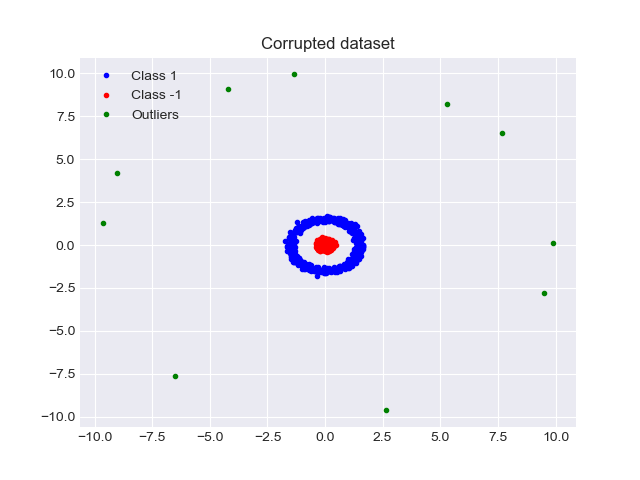

In [15]:
plt.title("Corrupted dataset")
plt.plot(X_1[:,0], X_1[:,1], 'bo', markersize=3, label="Class 1")
plt.plot(X_2[:,0], X_2[:,1], 'ro', markersize=3, label="Class -1")
plt.plot(addx[:,0], addx[:,1],'go', markersize=3, label="Outliers")
plt.legend()
plt.show()

### Model testing

Insure that the loss does not drop to 0 otherwise retrain the model.

#### Successful training

Accuracy for k= 30: 1


<IPython.core.display.Javascript object>


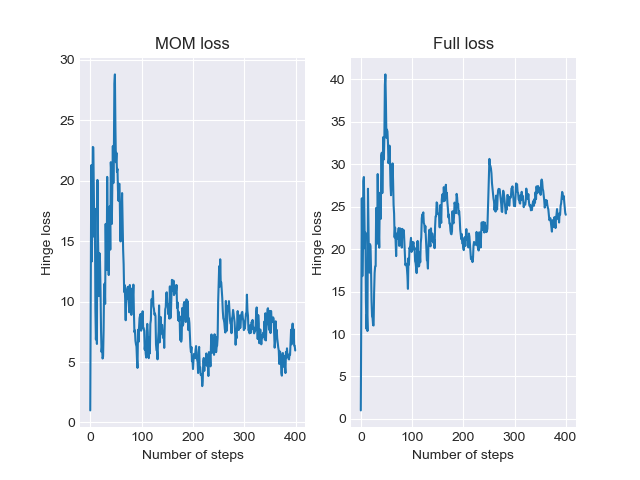

Text(0.5, 1.0, 'Full loss')

In [20]:
%matplotlib notebook
model = MomSvm(X_train, y_train, k=30, tol=1e-4, pen=0.01, max_iter=400, use_kernel=polynomial, kerparam=2, stepsize=0.1)
model.fit()
print("Accuracy for k= %d: %d" % (30, model.score(X_test, y_test)))
plt.subplot(121)
plt.plot(model.mom_loss)
plt.xlabel("Number of steps")
plt.ylabel('Hinge loss')
plt.title("MOM loss")
plt.subplot(122)
plt.plot(model.loss)
plt.xlabel("Number of steps")
plt.ylabel('Hinge loss')
plt.title("Full loss")

#### Failed training

Accuracy for k= 30: 0


<IPython.core.display.Javascript object>


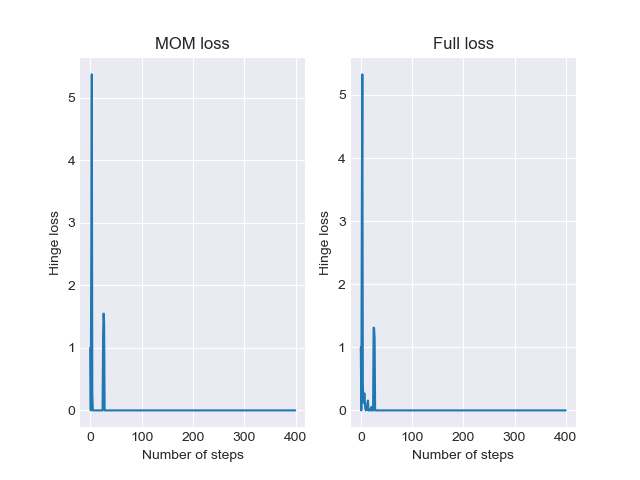

Text(0.5, 1.0, 'Full loss')

In [21]:
%matplotlib notebook
model = MomSvm(X_train, y_train, k=30, tol=1e-4, pen=0.01, max_iter=400, use_kernel=polynomial, kerparam=2, stepsize=0.1)
model.fit()
print("Accuracy for k= %d: %d" % (30, model.score(X_test, y_test)))
plt.subplot(121)
plt.plot(model.mom_loss)
plt.xlabel("Number of steps")
plt.ylabel('Hinge loss')
plt.title("MOM loss")
plt.subplot(122)
plt.plot(model.loss)
plt.xlabel("Number of steps")
plt.ylabel('Hinge loss')
plt.title("Full loss")